# COVID PNEUMONIA NORMAL LUNG DETECTION USING XRAY

1.IMPORTING NECESSARY LIBRARY AND DATASET

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 16
EPOCHS = 25
DATASET_PATH = "C:/Users/Shuhaib/Downloads/shuaib/cogno/task 3/COVID-19_Radiography_Dataset"


2.DATA PREPROCESSING

In [3]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


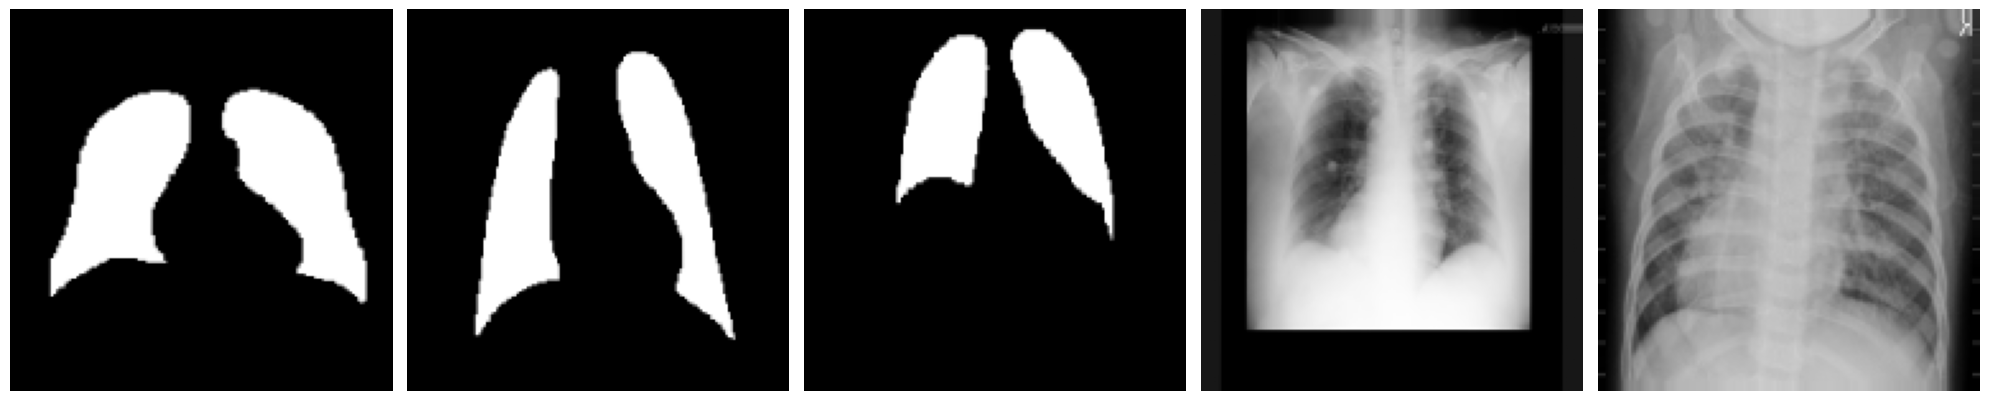

In [4]:
sample_training_images, _ = next(train_generator)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

3.MODEL BUILDING

In [5]:
model = Sequential([
    Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjusted to 4 classes: COVID-19, Pneumonia, Normal, Lung Opacity
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


4.MODEL TRAINING

In [6]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
) 

Epoch 1/25


C:\Users\Shuhaib\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2117/2117 ━━━━━━━━━━━━━━━━━━━━ 620s 292ms/step - accuracy: 0.5511 - loss: 1.0472 - val_accuracy: 0.6690 - val_loss: 0.7844
Epoch 2/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 460s 217ms/step - accuracy: 0.6504 - loss: 0.8340 - val_accuracy: 0.7010 - val_loss: 0.7189
Epoch 3/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 15068s 7s/step - accuracy: 0.6865 - loss: 0.7701 - val_accuracy: 0.7539 - val_loss: 0.6291
Epoch 4/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 712s 336ms/step - accuracy: 0.7018 - loss: 0.7366 - val_accuracy: 0.7749 - val_loss: 0.5731
Epoch 5/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 744s 351ms/step - accuracy: 0.7127 - loss: 0.7124 - val_accuracy: 0.7820 - val_loss: 0.5632
Epoch 6/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 745s 351ms/step - accuracy: 0.7192 - loss: 0.7030 - val_accuracy: 0.7967 - val_loss: 0.5233
Epoch 7/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 627s 296ms/step - accuracy: 0.7276 - loss: 0.6852 - val_accuracy: 0.8029 - val_loss: 0.5194
Epoch 8/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 696s 328ms/step - accuracy: 0.73

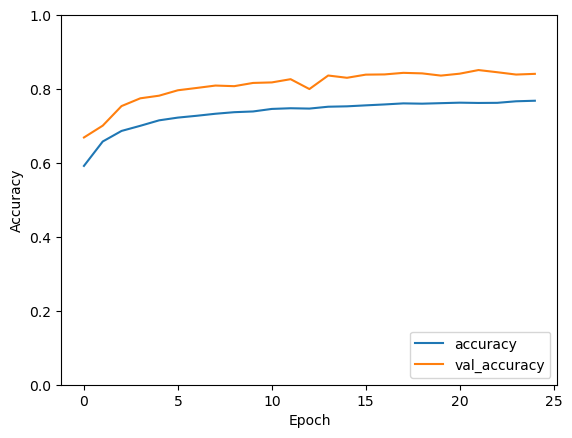

In [7]:
# Plotting Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Save Model
model.save('covid_pneumonia_normal_model.h5')

5.MODEL EVALUATION

In [8]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

529/529 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - accuracy: 0.8368 - loss: 0.4299
Test accuracy: 0.8383743166923523


Found 8464 images belonging to 4 classes.


C:\Users\Shuhaib\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


265/265 ━━━━━━━━━━━━━━━━━━━━ 31s 115ms/step
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.20      0.12      0.15      1446
      Normal       0.30      0.29      0.29      2404
   Pneumonia       0.48      0.57      0.52      4076
Lung Opacity       0.06      0.05      0.05       538

    accuracy                           0.38      8464
   macro avg       0.26      0.26      0.25      8464
weighted avg       0.36      0.38      0.36      8464



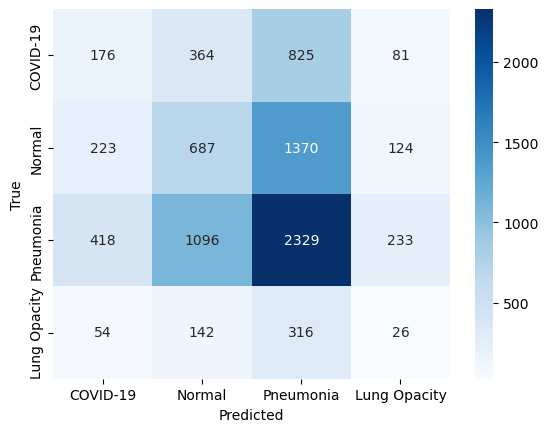

In [9]:


# Constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
DATASET_PATH = "C:/Users/Shuhaib/Downloads/shuaib/cogno/task 3/COVID-19_Radiography_Dataset"
MODEL_PATH = 'covid_pneumonia_normal_model.h5'

# Recreate the validation data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load the trained model
model = load_model(MODEL_PATH)

# Predict on validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Define class labels (Ensure these match your training labels)
class_labels = ['COVID-19', 'Normal', 'Pneumonia', 'Lung Opacity']

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


6.MODEL PREDICTION

In [12]:

# Load and preprocess a new image
img_path = "C:/Users/Shuhaib/Downloads/shuaib/cogno/task 3/COVID-19_Radiography_Dataset/COVID/images/COVID-853.png"# Replace with the path to your image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make a prediction
prediction = model.predict(img_array)

# Get the index of the highest probability
predicted_class_index = np.argmax(prediction)

# Define the class labels (Make sure this matches your model's classes)
class_labels = ['COVID-19','Lung Opacity', 'Normal', 'Pneumonia']
r
# Print the predicted class
predicted_class = class_labels[predicted_class_index]
print(f"Predicted Disease: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Disease: COVID-19
